        condition  response_status  reaction_time  participant_age
count  600.000000       600.000000     600.000000       600.000000
mean     0.500000         0.968333     526.275930        32.800000
std      0.500417         0.175257     167.996142        14.646417
min      0.000000         0.000000     247.652000        20.000000
25%      0.000000         1.000000     412.506000        22.000000
50%      0.500000         1.000000     500.045500        24.000000
75%      1.000000         1.000000     591.221250        38.000000
max      1.000000         1.000000    1932.541000        60.000000

Accuracy Percentage per Participant:
participant_name
DaniilTheBig       98.333333
Felix Funk         91.666667
Frank             100.000000
Kira               96.666667
Korvin             96.666667
Mai                98.333333
Sophia Kokonut     96.666667
Susanne            96.666667
Tester 1           98.333333
Tester 2           95.000000
Name: response_status, dtype: float64

Accuracy Perc

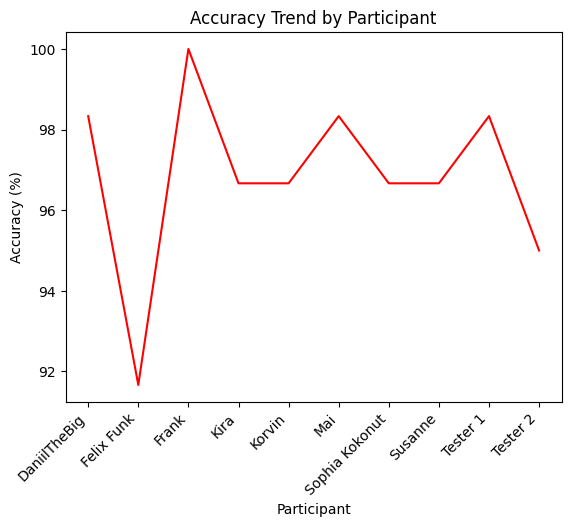

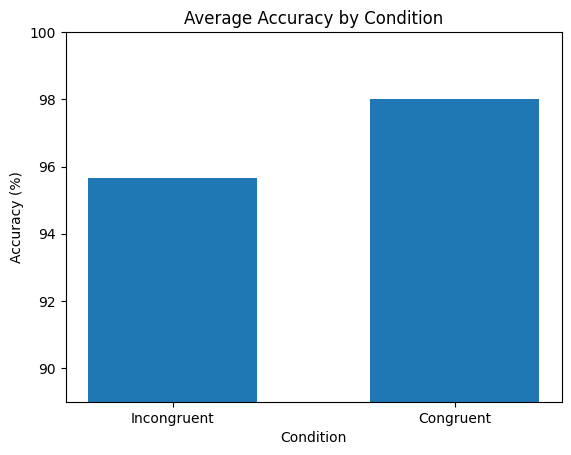

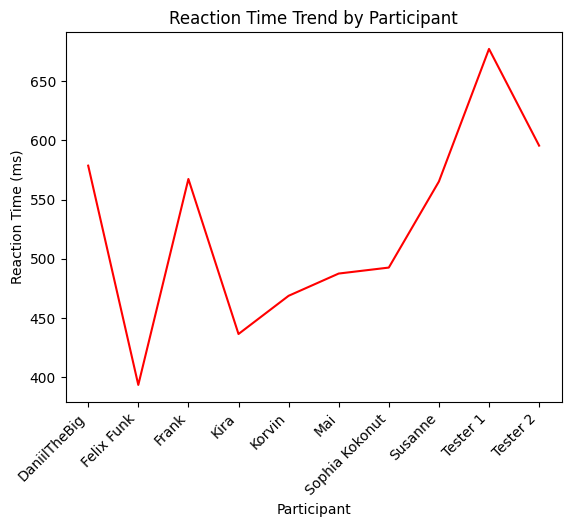

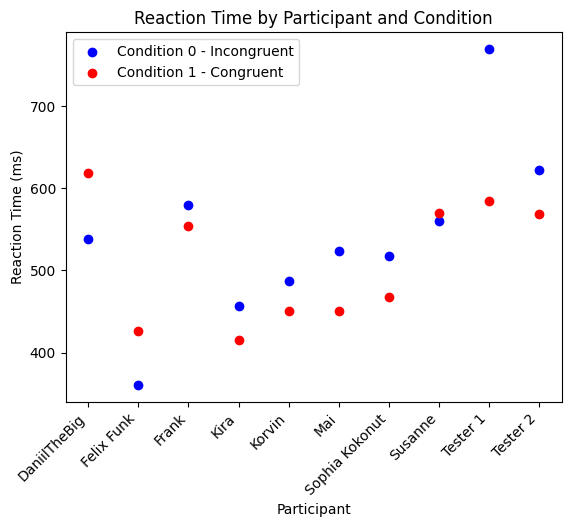

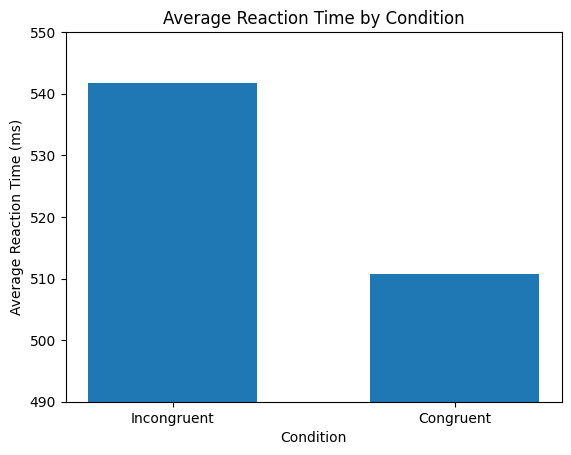

In [52]:
import pandas as pd

df = pd.read_csv("combined_data.csv")

df.head()

df.shape

print(df.describe())

# Accuracy by Participant
# We group by 'participant_name' and look at 'response_status'
# Calculate the data
participant_accuracy = df.groupby('participant_name')['response_status'].mean() * 100
print("\nAccuracy Percentage per Participant:")
print(participant_accuracy)

# Average Accuracy by Condition
participant_acccond = (df.groupby('condition')['response_status'].mean() * 100)
print("\nAccuracy Percentage per Condition:")
print(participant_acccond)


# Reaction Time by Participant
participant_rt = df.groupby('participant_name')['reaction_time'].mean()
print("\nReaction Time per Participant:")
print(participant_rt)

# Reaction Time by Participant and Condition
participant_rtcond = df.groupby(['participant_name', 'condition'])['reaction_time'].mean()
print("\nReaction Time per Participant and Condition:")
print(participant_rtcond)

participant_rtcond_wide = (df.groupby(['participant_name', 'condition'])['reaction_time'].mean().unstack())

# Performance by Condition
# We group by 'condition' to see if reaction times or scores differ
condition_analysis = df.groupby('condition')[['reaction_time']].mean()
print("\nAverage RT by Condition:")
print(condition_analysis)


import matplotlib.pyplot as plt

# Plotting Accuracy by Participant
plt.plot(participant_accuracy.index, participant_accuracy.values, color='red')
plt.title('Accuracy Trend by Participant')
plt.xlabel('Participant')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting Average Accuracy by Condition
plt.bar(participant_acccond.index, participant_acccond.values, width=0.6)

plt.xticks([0, 1], ['Incongruent', 'Congruent'])
plt.ylim(89, 100)
plt.title('Average Accuracy by Condition')
plt.xlabel('Condition')
plt.ylabel('Accuracy (%)')
plt.show()

# Plotting Reaction Time by Participant
plt.plot(participant_rt.index, participant_rt.values, color='red')
plt.title('Reaction Time Trend by Participant')
plt.xlabel('Participant')
plt.ylabel('Reaction Time (ms)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting Reaction Time by Participant and Condition
plt.scatter(
    participant_rtcond_wide.index,
    participant_rtcond_wide[0],
    label='Condition 0 - Incongruent',
    color='blue'
)

plt.scatter(
    participant_rtcond_wide.index,
    participant_rtcond_wide[1],
    label='Condition 1 - Congruent',
    color='red'
)

plt.title('Reaction Time by Participant and Condition')
plt.xlabel('Participant')
plt.ylabel('Reaction Time (ms)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting Average Reaction Time by Condition
plt.bar(
    condition_analysis.index,
    condition_analysis['reaction_time'],
    width=0.6
)
plt.ylim(490, 550)
plt.xticks([0, 1], ['Incongruent', 'Congruent'])
plt.title('Average Reaction Time by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Reaction Time (ms)')
plt.show()


In [53]:
# Average Accuracy by Condition
participant_acccond = (df.groupby('condition')['response_status'].mean() * 100)
print("\nAccuracy Percentage per Condition:")
print(participant_acccond)


Accuracy Percentage per Condition:
condition
0    95.666667
1    98.000000
Name: response_status, dtype: float64


In [45]:
# Performance by Condition
# We group by 'condition' to see if reaction times or scores differ
condition_analysis = df.groupby('condition')[['reaction_time']].mean()
print("\nAverage RT by Condition:")
print(condition_analysis)


Average RT by Condition:
           reaction_time
condition               
0             541.771307
1             510.780553


In [44]:
# Reaction Time by Participant
participant_rt = df.groupby('participant_name')['reaction_time'].mean()
print("\nReaction Time per Participant:")
print(participant_rt)


Reaction Time per Participant:
participant_name
DaniilTheBig      578.703683
Felix Funk        393.302383
Frank             567.427033
Kira              436.357717
Korvin            468.652383
Mai               487.474467
Sophia Kokonut    492.519617
Susanne           565.284400
Tester 1          677.404433
Tester 2          595.633183
Name: reaction_time, dtype: float64
